In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

In [2]:
# エクセル上で前処理を実施
# 実施した前処理
#　　1 車内気温の空欄を対応する車外気温を条件に絞込み車内気温の平均で埋める
#　　2 Specialsからsnowを抽出しダミー変数として追加
#　　3 重量の記録（搭乗者、残油量）が無い為、refill litersを排除、合わせてrefill gasを排除
#　　4 SpecialsからHalfSunHalfRainをrain=0.5,sun=0.5として設定
#　　5 天候に依存してブレーキを踏む回数が増加するとして　rainとsnowの合計をSlipとして追加
#　　6 Specialsは天候とACのダミー変数で賄えるため排除、sunは車外気温に含まれるとして排除
#　　7 gasTypeをダミー変数として分離し、gasTypeごとのデータ、全て含むデータを作成

#走行距離	消費L	走行速度	車内気温	車外気温	エアコン	スリップ係数(天候によるブレーキ量の係数,晴れ時々雨=0.5、雨=1、雪=2)
df_SP98 = pd.read_csv("measurements4_SP98.csv")[['distance','consume','speed','temp_inside','temp_outside','AC','Slip']]
df_E10  = pd.read_csv("measurements5_E10.csv")[['distance','consume','speed','temp_inside','temp_outside','AC','Slip']]

#走行距離	消費L	走行速度	車内気温	車外気温	エアコン	雨	晴	雪	SP98
df = pd.read_csv("measurements6.csv")[['consume','distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]
df['Slip'] = df.rain + df.snow

# のデータ
display(df_SP98.head())
display(df_SP98.describe())
display(df_E10.head())
display(df_E10.describe())
display(df.head())
display(df.describe())

randomValue = 200
splitSize    = 5


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
0,5.4,3.3,32,21.5,7,0,0.0
1,2.0,9.9,21,21.5,4,0,0.0
2,14.2,5.1,32,21.5,7,0,0.0
3,16.0,4.9,25,21.5,8,0,0.0
4,11.8,4.9,25,21.5,11,0,0.0


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,18.639912,4.899123,40.820175,21.923246,12.228070,0.100877,0.151316
std,24.179598,1.118408,13.170122,1.181552,7.271373,0.301829,0.392830
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,2.000000


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
0,28.0,5.0,26,21.5,12,0,0
1,12.0,4.2,30,21.5,13,0,0
2,11.2,5.5,38,21.5,15,0,0
3,12.9,3.9,36,21.5,14,0,0
4,18.5,4.5,46,21.5,15,0,0


,distance,consume,speed,temp_inside,temp_outside,AC,Slip
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,21.096250,4.931250,43.506250,21.918750,10.118750,0.050000,0.106250
std,20.307234,0.900956,14.077949,0.653697,6.392185,0.218629,0.328842
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,2.000000


,consume,distance,speed,temp_inside,temp_outside,AC,sun,rain,snow,SP98,Slip
0,5.0,28.0,26,21.5,12,0,0,0,0,0,0
1,4.2,12.0,30,21.5,13,0,0,0,0,0,0
2,5.5,11.2,38,21.5,15,0,0,0,0,0,0
3,3.9,12.9,36,21.5,14,0,0,0,0,0,0
4,4.5,18.5,46,21.5,15,0,0,0,0,0,0


,consume,distance,speed,temp_inside,temp_outside,AC,sun,rain,snow,SP98,Slip
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,4.912371,19.652835,41.927835,21.922388,11.358247,0.079897,0.085052,0.123711,0.010309,0.587629,0.134021
std,1.033172,22.667837,13.598524,0.996424,6.991542,0.271484,0.279319,0.329677,0.101140,0.492897,0.370177
min,3.300000,1.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,11.800000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.700000,14.600000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.300000,19.000000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12.200000,216.100000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [3]:
y_SP98 = df_SP98['consume']
X_SP98 = df_SP98[['distance','speed','temp_inside','temp_outside','AC','Slip']]
y_E10  = df_E10['consume']
X_E10  = df_E10[['distance','speed','temp_inside','temp_outside','AC','Slip']]
y_ALL  = df['consume']
X_ALL  = df[['distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]
#X_ALL  = df[['distance','speed','temp_inside','temp_outside','AC','Slip','SP98']]

y_ALL_old  = df['consume']
#X_ALL  = df[['distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]
X_ALL_old1 = df[['distance','speed','temp_inside','temp_outside','AC','Slip','SP98']]
X_ALL_old2 = df[['distance','speed','temp_inside','temp_outside','AC','sun','rain','snow','SP98']]


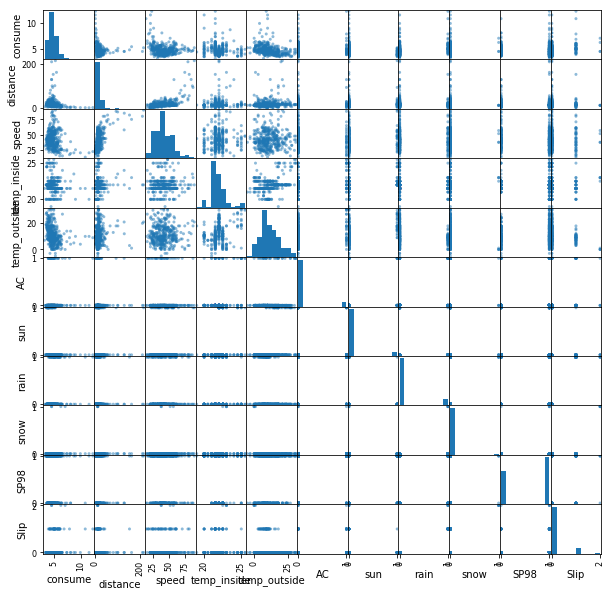

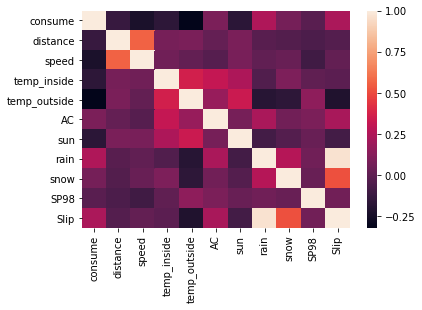

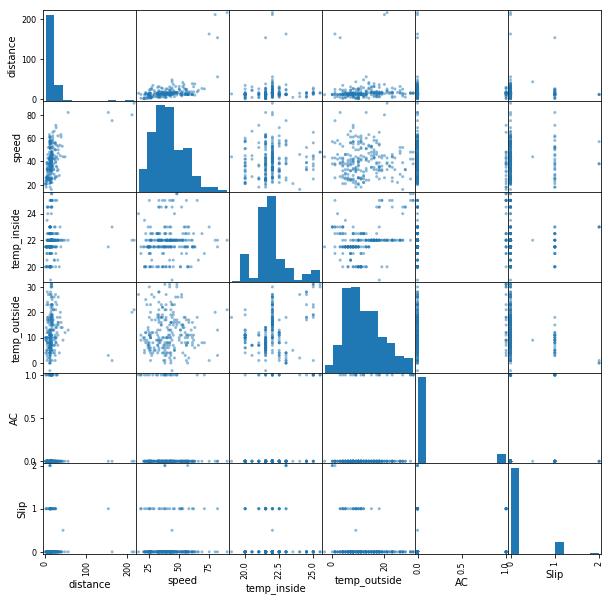

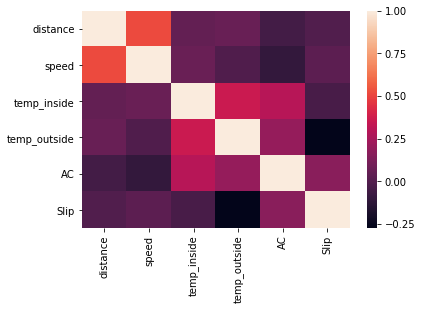

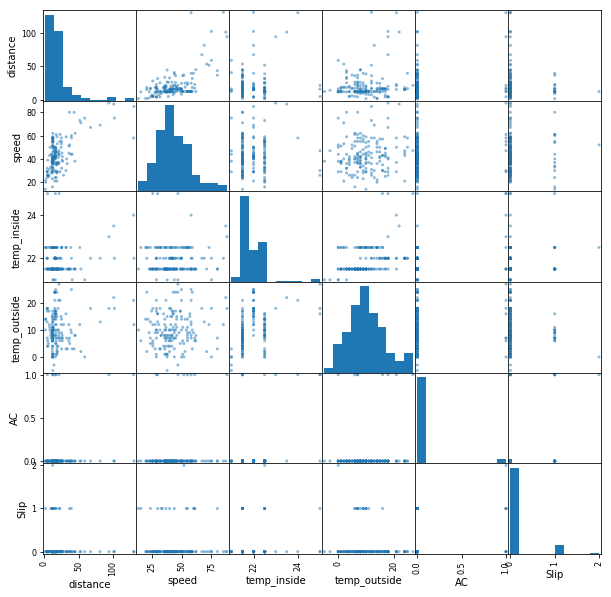

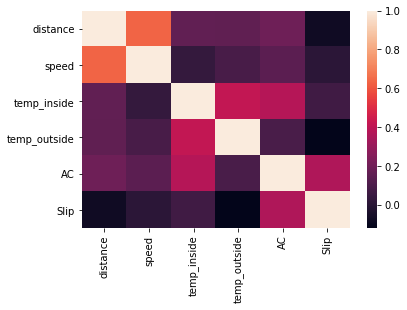

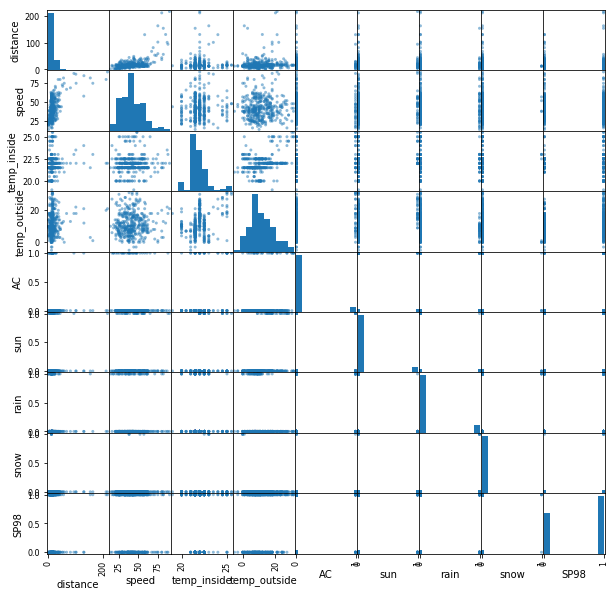

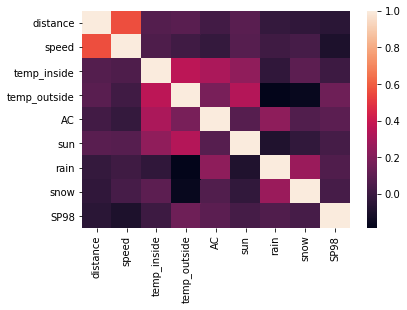

In [4]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.show()
sns.heatmap(df.corr())
plt.show()

pd.plotting.scatter_matrix(X_SP98,figsize=(10,10))
plt.show()
sns.heatmap(X_SP98.corr())
plt.show()

pd.plotting.scatter_matrix(X_E10,figsize=(10,10))
plt.show()
sns.heatmap(X_E10.corr())
plt.show()

pd.plotting.scatter_matrix(X_ALL,figsize=(10,10))
plt.show()
sns.heatmap(X_ALL.corr())
plt.show()


In [5]:
##  無相関化を行うための一連の処理
X_SP98_C2 = np.array(X_SP98[['speed','distance']])
X_E10_C2  = np.array(X_E10[['speed','distance']])
X_ALL_C2  = np.array(X_ALL[['speed','distance']])

convertSet = [X_SP98_C2,X_E10_C2,X_ALL_C2]
convertedSet = []
for data1 in convertSet:
    cov = np.cov(data1, rowvar=0)         # 分散・共分散を求める
    _, S = np.linalg.eig(cov)             # 分散共分散行列の固有ベクトルを用いて
    data1_decorr = np.dot(S.T, data1.T).T #データを無相関化
    convertedSet.append(data1_decorr)

X_SP98_C2_CONVERTED = convertedSet[0]
X_E10_C2_CONVERTED  = convertedSet[1]
X_ALL_C2_CONVERTED  = convertedSet[2]

X_SP98['speed']    = X_SP98_C2_CONVERTED[:,0]
X_SP98['distance'] = X_SP98_C2_CONVERTED[:,1]
X_E10['speed']     = X_E10_C2_CONVERTED[ :,0]
X_E10['distance']  = X_E10_C2_CONVERTED[ :,1]
X_ALL['speed']     = X_ALL_C2_CONVERTED[ :,0]
X_ALL['distance']  = X_ALL_C2_CONVERTED[ :,1]


c:\users\n202\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\n202\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\n202\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

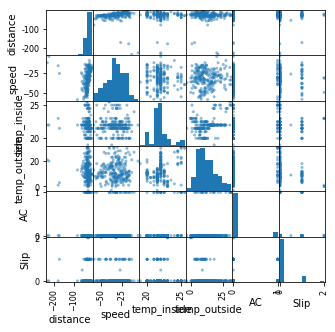

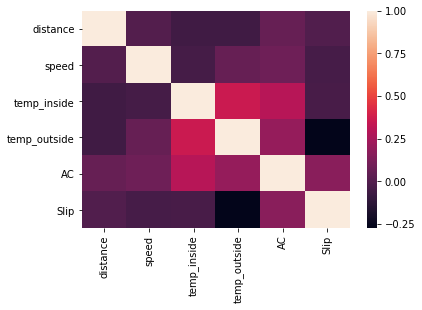

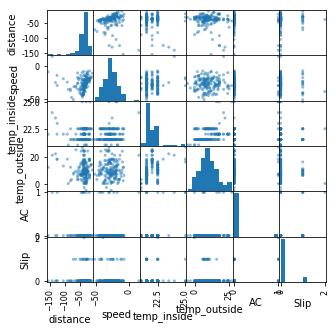

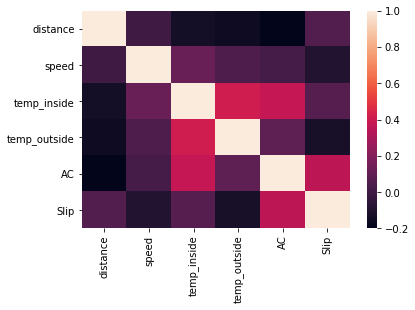

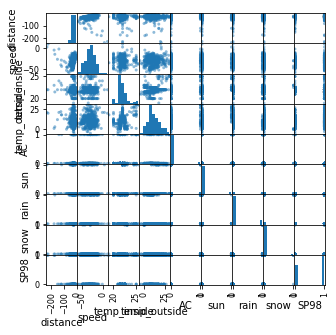

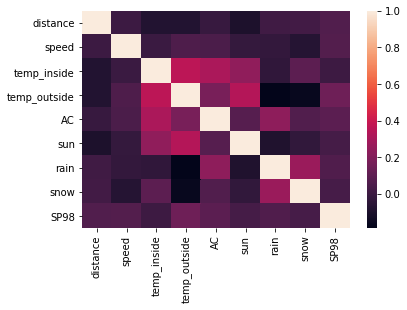

In [6]:
pd.plotting.scatter_matrix(X_SP98,figsize=(5,5))
plt.show()
sns.heatmap(X_SP98.corr())
plt.show()
pd.plotting.scatter_matrix(X_E10,figsize=(5,5))
plt.show()
sns.heatmap(X_E10.corr())
plt.show()
pd.plotting.scatter_matrix(X_ALL,figsize=(5,5))
plt.show()
sns.heatmap(X_ALL.corr())
plt.show()


# 説明変数のスケーリングを個別に行う

In [7]:
from sklearn.preprocessing import StandardScaler
def scaleOnlyLarge(_X_train,_X_test,Large = 1):
    # 平均が指定値を下回る変数は処理しない
    for i in range(_X_train.shape[1]):
        if _X_train[:,i].mean() > Large:
            mean = _X_train[:,i].mean()
            std  = _X_train[:,i].std()
            _X_train[:,i] = ( _X_train[:,i] - mean ) / std
            _X_test[:,i]  = ( _X_test[:,i]  - mean ) / std
            
    ret = []
    ret.append(_X_train)
    ret.append(_X_test)
    return ret
    


# テストクラスの実装

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

class test:
    def __init__(self):
        self.Random = -1
        self.Split  = -1
        
    def setRandom(self,_random):
        self.Random = _random

    def setSplit(self,_split):
        self.Split = _split
    
    def getRandom(self):
        return self.Random
    def getSplit(self):
        return self.Split
    
    def do(self,_model):
        return {"mse_train":0,"mse_test":0}

    def modelKick(self,_model,_X_train,_y_train,_X_test,_y_test):
        _model.fit(_X_train, _y_train)
        y_pred_train = _model.predict(_X_train)
        y_pred_test  = _model.predict(_X_test)
        mse_train = mean_squared_error(_y_train, y_pred_train)
        mse_test  = mean_squared_error(_y_test,  y_pred_test)
        return {"mse_train":mse_train,"mse_test":mse_test}
    
    def scaling(self,_X_train,_X_test):
        ret = []
        scaler = StandardScaler()
        scaler.fit(_X_train)
        ret.append(scaler.transform(_X_train))
        ret.append(scaler.transform(_X_test))
        return ret
    
class foldOutTest(test):
    def __init__(self,_X,_y,_random,scaleFunc=None,_isSuffle=True):
        
        self.setRandom(_random)
        datas = train_test_split(np.array(_X), np.array(_y), test_size=0.2,shuffle=_isSuffle,random_state = _random)
        self.X_train = datas[0]
        self.X_test  = datas[1]
        self.y_train = datas[2]
        self.y_test  = datas[3]

        if scaleFunc == None:
            self.X_train,self.X_test = self.scaling(self.X_train,self.X_test)
        else:
            self.X_train,self.X_test = scaleFunc(self.X_train,self.X_test)
        
    def do(self,_model):
        return self.modelKick(_model,self.X_train,self.y_train,self.X_test,self.y_test)

class kFoldTest(test):
    def __init__(self,_X,_y,_split,_random,scaleFunc=None,_isSuffle=True):

        self.setSplit(_split)
        self.setRandom(_random)

        self.split = _split
        splitter = KFold(n_splits=_split, shuffle=_isSuffle, random_state=_random)

        self.X_train = []
        self.y_train = []
        self.X_test  = []
        self.y_test  = []

        
        X = np.array(_X)
        y = np.array(_y)
        
        for train_idx, test_idx in splitter.split(X,y):

            X_train_k, y_train_k = X[train_idx], y[train_idx] #学習用データ
            X_test_k, y_test_k   = X[test_idx] , y[test_idx]  #テスト用データ

            if scaleFunc == None:
                X_train_k,X_test_k = self.scaling(X_train_k,X_test_k)
            else:
                X_train_k,X_test_k = scaleFunc(X_train_k,X_test_k)

            self.X_train.append(X_train_k)
            self.y_train.append(y_train_k)
            self.X_test.append(X_test_k)
            self.y_test.append(y_test_k)

    def do(self,_model):
        mse_test_sum  = 0
        mse_train_sum = 0
        for i in range(self.split):
            mse_pair = self.modelKick(_model,self.X_train[i],self.y_train[i],self.X_test[i],self.y_test[i])
            mse_test_sum  += mse_pair["mse_test"]
            mse_train_sum += mse_pair["mse_train"]
        
        mse_test  = mse_test_sum / self.split
        mse_train = mse_train_sum / self.split

        return {"mse_train":mse_train,"mse_test":mse_test}


# 各モデルの実装

In [9]:
# 各モデルの実装
from sklearn.linear_model import Lasso   as L1,  Ridge   as L2,  ElasticNet   as EN,  LinearRegression   as Line
from sklearn.linear_model import LassoCV as L1CV,RidgeCV as L2CV,ElasticNetCV as ENCV
# 線形回帰モデルのCross Validationバージョンは存在しない？
#from sklearn.linear_model import LinearRegressionCV as LineCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

def linearTest(_test,_param = {"alpha":-1}):
    clf = Line()
    mse_ret = _test.do(clf)
    ret = {"alpha":-1,"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

def lassoTest(_test,_param):
    clf = L1(alpha=_param["alpha"])
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

def ridgeTest(_test,_param):
    clf = L2(alpha=_param["alpha"])
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

def elasticNetTest(_test,_param):
    clf = EN(alpha=_param["alpha"],l1_ratio=_param["l1_ratio"])
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],
           "random":_test.getRandom(),
           "l1_ratio":_param["l1_ratio"],
           "wait":clf.coef_,
           "bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

# 全てAlphaが同じであるならば
# 外部でKFoldを実施した場合と同一の結果が出るはず
# 意図した結果が得られていないためCV系モデルを再実装してテスト

## 確認結果、テストデータの並びに依存して変化している、CV系とKfoldには差異なし
## Day2の処理結果は偶然

##def linearCVTest(_test):
##    cv = splitSize
##    clf = LineCV(cv)
##     mse_ret = _test.do(clf)
##     ret = {"alpha":-1,"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
##     ret.update(mse_ret)
##     return ret

def lassoCVTest(_test,_param):
    cv = _param["cv"]
    alphaV = np.ones(cv)
    alphaV = alphaV * _param["alpha"]
    clf = L1CV(alphas=alphaV,cv=cv)
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

def ridgeCVTest(_test,_param):
    cv = _param["cv"]
    alphaV = np.ones(cv)
    alphaV = alphaV * _param["alpha"]
    clf = L2CV(alphas=alphaV,cv=cv)
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],"random":_test.getRandom(),"wait":clf.coef_,"bias":clf.intercept_}
    ret.update(mse_ret)
    return ret

def elasticNetCVTest(_test,_param):
    cv = _param["cv"]
    alphaV = np.ones(cv)
    alphaV = alphaV * _param["alpha"]
    clf = ENCV(alphas=alphaV,cv=cv,l1_ratio=_param["l1_ratio"])
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],
           "random":_test.getRandom(),
           "l1_ratio":_param["l1_ratio"],
           "wait":clf.coef_,
           "bias":clf.intercept_}
    ret.update(mse_ret)
    return ret



## 最適パラメーターのチェック

In [10]:
def checkAParam(_Wait,_MSE):
    bestWait  = -1
    minMse    = 100000000000
    
    ret = {"bestWait":-1,"minMse":100000000000}

    for i in range(_Wait.size):
        if _MSE[i] < minMse:
            minMse = _MSE[i]
            bestWait = _Wait[i]

    ret["bestWait"] = bestWait
    ret["minMse"]   = minMse
    return ret

def check2Param(_Waits,_MSEs,_Ratios):
    bestWait  = -1
    bestRatio = -1
    minMse    = 100000000000

    ret = {"bestWait":-1,"bestRatio":-1,"minMse":100000000000}

    for i in range(_Ratios[:,0].size):
        for j in range(_Waits[i,:].size):
            if _MSEs[i,j] < minMse:
                minMse = _MSEs[i,j]
                bestWait = _Waits[i,j]
                bestRatio = _Ratios[i,j]
    
    ret["bestWait"]  = bestWait
    ret["bestRatio"] = bestRatio
    ret["minMse"]    = minMse
    return ret


## WaitとMSEの表示

In [11]:
def showOneGraph(_label,_Wait,_MSE):
    plt.figure(figsize=(16,4))
    plt.plot(_Wait,_MSE,label=_label,color='C1')
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend()
    plt.show()
    
    param = checkAParam(_Wait,_MSE)
    print("{} 二乗誤差、最小：{:.3f} 最適な係数：{:.3f}".format(_label,param["minMse"],param["bestWait"]))
    print("")

def showTwoGraph(_label,_Wait,_MSE_train,_MSE_test):
    plt.figure(figsize=(16,4))
    plt.plot(_Wait,_MSE_train,label="{} Train".format(_label),color='C1')
    plt.plot(_Wait,_MSE_test,label="{} Test".format(_label),color='C2')
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend()
    plt.show()
    
    param = checkAParam(_Wait,_MSE_train)
    print("{} 訓練 二乗誤差、最小：{:.3f} 最適な係数：{:.3f}".format(_label,param["minMse"],param["bestWait"]))
    param = checkAParam(_Wait,_MSE_test)
    print("{} 汎化 二乗誤差、最小：{:.3f} 最適な係数：{:.3f}".format(_label,param["minMse"],param["bestWait"]))
    print("")

def showMultiGraph(_label,_Waits,_MSEs,_Ratios):
    plt.figure(figsize=(16,4))
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    for i in range(_Ratios[:,0].size):
        plt.plot(_Waits[i,:],_MSEs[i,:],label="{} {:.3f}".format(_label,_Ratios[i,0]))
        
    plt.legend()
    plt.show()

    param = check2Param(_Waits,_MSEs,_Ratios)
    print("{}  二乗誤差、最小：{:.3f} 最適な係数：{:.3f} L1の寄与率：{:.6f}".format(
        _label,
        param["minMse"],
        param["bestWait"],
        param["bestRatio"]))
    print("")

def showMultiGraph2(_label,_Waits,_MSEs,_Ratios):
    plt.figure(figsize=(16,4))
    plt.grid(which='major',color='black',linestyle=':')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    for i in range(_Ratios[:,0].size):
        plt.plot(_Waits[i,:],_MSEs[i,:],label="{} {:.3f}".format(_label,_Ratios[i,0]))
        
    plt.legend()
    plt.show()

    param = check2Param(_Waits,_MSEs,_Ratios)
    print("{}  二乗誤差、最小：{:.3f} 最適な分割数：{:.3f} 最適な不純度の許容値：{:.6f}".format(
        _label,
        param["minMse"],
        param["bestWait"],
        param["bestRatio"]))
    print("")


# 重みなどの表示

In [12]:
def checkTypeNone(_value):
    return type(_value) != type(None)

def printRetValue(_label,_ret):

    waitOut = "{}".format(_label)
    if checkTypeNone(_ret.get("wait")):
        for i in range(len(_ret["wait"])):
            waitOut += " 重み{:d}：{:.3f}".format(i+1,_ret["wait"][i])
        print(waitOut)
    if checkTypeNone(_ret.get("bias")):
        print("{}バイアス：{:.3f}".format(_label,_ret["bias"]))
    if checkTypeNone(_ret.get("mse_train")):
        print("{}訓練 二乗誤差：{:.3f}".format(_label,_ret["mse_train"]))
    if checkTypeNone(_ret.get("mse_test")):
        print("{}汎化 二乗誤差：{:.3f}".format(_label,_ret["mse_test"]))
    if checkTypeNone(_ret.get("l1_ratio")):
        print("{}L1正則化比重：{:.3f}".format(_label,_ret["l1_ratio"]))
    print("")

# 前回の処理結果
### 訓練誤差を確認した所、結果の逆転するテストデータパラメーターであった
### テストデータ生成方法は変更する

In [13]:
# Lasso、Ridge、ElasticNetのどれを使ってもどんぐりの背比べの状態
# Ridge向き？

# speed：-0.120756
# temp_inside：-0.054757
# temp_outside：-0.169525
# AC：0.048508
# sun：-0.031087
# rain：0.137269
testALLFoldOut  = foldOutTest(X_ALL_old2,y_ALL_old,100,None,True)
param = {"alpha":0.571,"l1_ratio":0.081,"cv":5}
ret_ALL = elasticNetCVTest(testALLFoldOut,param)
printRetValue("ALL2 ",ret_ALL)


ALL2  重み1：-0.000 重み2：-0.121 重み3：-0.053 重み4：-0.169 重み5：0.045 重み6：-0.031 重み7：0.138 重み8：0.000 重み9：-0.000
ALL2 バイアス：4.894
ALL2 訓練 二乗誤差：0.932
ALL2 汎化 二乗誤差：0.662
ALL2 L1正則化比重：0.081



# 簡易モデルの作成（説明変数は前処理済み）
## Day2テストデータでの各モデルの誤差を確認

In [14]:
# テストデータの切り方に依存して処理結果が大幅に異なる
# Day2で作成していたテストデータでの確認
param = {"alpha":0.1,"l1_ratio":0.1,"cv":splitSize}
test  = foldOutTest(X_ALL,y_ALL,100,None,True)
ret_ALL = linearTest(test,param)
printRetValue("ALL None",ret_ALL)

ret_ALL = lassoTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetTest(test,param)
printRetValue("ALL EN",ret_ALL)

ret_ALL = lassoCVTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeCVTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetCVTest(test,param)
printRetValue("ALL EN",ret_ALL)


ALL None 重み1：0.133 重み2：0.187 重み3：-0.104 重み4：-0.282 重み5：0.133 重み6：-0.036 重み7：0.216 重み8：-0.013 重み9：-0.031
ALL Noneバイアス：4.894
ALL None訓練 二乗誤差：0.885
ALL None汎化 二乗誤差：0.697

ALL L1 重み1：0.047 重み2：0.087 重み3：-0.000 重み4：-0.225 重み5：0.000 重み6：-0.000 重み7：0.166 重み8：0.000 重み9：-0.000
ALL L1バイアス：4.894
ALL L1訓練 二乗誤差：0.941
ALL L1汎化 二乗誤差：0.676

ALL L2 重み1：0.133 重み2：0.187 重み3：-0.104 重み4：-0.282 重み5：0.133 重み6：-0.036 重み7：0.216 重み8：-0.013 重み9：-0.031
ALL L2バイアス：4.894
ALL L2訓練 二乗誤差：0.885
ALL L2汎化 二乗誤差：0.697

ALL EN 重み1：0.115 重み2：0.162 重み3：-0.091 重み4：-0.253 重み5：0.108 重み6：-0.038 重み7：0.197 重み8：-0.000 重み9：-0.017
ALL ENバイアス：4.894
ALL EN訓練 二乗誤差：0.888
ALL EN汎化 二乗誤差：0.683
ALL ENL1正則化比重：0.100

ALL L1 重み1：0.047 重み2：0.087 重み3：-0.000 重み4：-0.225 重み5：0.000 重み6：-0.000 重み7：0.166 重み8：0.000 重み9：-0.000
ALL L1バイアス：4.894
ALL L1訓練 二乗誤差：0.941
ALL L1汎化 二乗誤差：0.676

ALL L2 重み1：0.133 重み2：0.187 重み3：-0.104 重み4：-0.282 重み5：0.133 重み6：-0.036 重み7：0.216 重み8：-0.013 重み9：-0.031
ALL L2バイアス：4.894
ALL L2訓練 二乗誤差：0.885
ALL L2汎化 二乗誤差：0.697

ALL EN 重み1：0.1

# テストデータ調整版１
## 全ての変数をスケーリングした場合

In [15]:
#test  = foldOutTest(np.array(X_SP98),np.array(y_SP98),randomValue)


param = {"alpha":0.1,"l1_ratio":0.1,"cv":splitSize}
test  = kFoldTest(X_ALL,y_ALL,splitSize,randomValue)
#test  = foldOutTest(X_ALL,y_ALL,randomValue,False)
ret_ALL = linearTest(test,param)
printRetValue("ALL None",ret_ALL)

ret_ALL = lassoTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetTest(test,param)
printRetValue("ALL EN",ret_ALL)

ret_ALL = lassoCVTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeCVTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetCVTest(test,param)
printRetValue("ALL EN",ret_ALL)



ALL None 重み1：0.160 重み2：0.227 重み3：-0.077 重み4：-0.313 重み5：0.131 重み6：-0.044 重み7：0.153 重み8：-0.009 重み9：-0.009
ALL Noneバイアス：4.967
ALL None訓練 二乗誤差：0.835
ALL None汎化 二乗誤差：0.933

ALL L1 重み1：0.076 重み2：0.125 重み3：-0.000 重み4：-0.251 重み5：0.007 重み6：-0.000 重み7：0.103 重み8：0.000 重み9：0.000
ALL L1バイアス：4.967
ALL L1訓練 二乗誤差：0.887
ALL L1汎化 二乗誤差：0.937

ALL L2 重み1：0.160 重み2：0.226 重み3：-0.077 重み4：-0.313 重み5：0.131 重み6：-0.044 重み7：0.153 重み8：-0.009 重み9：-0.009
ALL L2バイアス：4.967
ALL L2訓練 二乗誤差：0.835
ALL L2汎化 二乗誤差：0.933

ALL EN 重み1：0.140 重み2：0.197 重み3：-0.069 重み4：-0.279 重み5：0.106 重み6：-0.047 重み7：0.140 重み8：-0.000 重み9：-0.000
ALL ENバイアス：4.967
ALL EN訓練 二乗誤差：0.839
ALL EN汎化 二乗誤差：0.921
ALL ENL1正則化比重：0.100

ALL L1 重み1：0.076 重み2：0.125 重み3：-0.000 重み4：-0.251 重み5：0.007 重み6：-0.000 重み7：0.103 重み8：0.000 重み9：0.000
ALL L1バイアス：4.967
ALL L1訓練 二乗誤差：0.887
ALL L1汎化 二乗誤差：0.937

ALL L2 重み1：0.160 重み2：0.226 重み3：-0.077 重み4：-0.313 重み5：0.131 重み6：-0.044 重み7：0.153 重み8：-0.009 重み9：-0.009
ALL L2バイアス：4.967
ALL L2訓練 二乗誤差：0.835
ALL L2汎化 二乗誤差：0.933

ALL EN 重み1：0.140

# テストデータ調整版２
## スケーラーを変更した場合
## L1の精度が下がり、L2の精度が上がっている事を確認

In [16]:
#test  = foldOutTest(np.array(X_SP98),np.array(y_SP98),randomValue)


param = {"alpha":0.1,"l1_ratio":0.1,"cv":splitSize}
test  = kFoldTest(X_ALL,y_ALL,splitSize,randomValue,scaleOnlyLarge)
#test  = foldOutTest(X_SP98,y_SP98,randomValue,False)
ret_ALL = linearTest(test,param)
printRetValue("ALL None",ret_ALL)

ret_ALL = lassoTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetTest(test,param)
printRetValue("ALL EN",ret_ALL)

ret_ALL = lassoCVTest(test,param)
printRetValue("ALL L1",ret_ALL)

ret_ALL = ridgeCVTest(test,param)
printRetValue("ALL L2",ret_ALL)

ret_ALL = elasticNetCVTest(test,param)
printRetValue("ALL EN",ret_ALL)



ALL None 重み1：0.007 重み2：0.022 重み3：-0.077 重み4：-0.313 重み5：0.449 重み6：-0.148 重み7：0.447 重み8：-0.083 重み9：-0.018
ALL Noneバイアス：5.792
ALL None訓練 二乗誤差：0.835
ALL None汎化 二乗誤差：0.933

ALL L1 重み1：0.008 重み2：0.021 重み3：-0.000 重み4：-0.262 重み5：0.000 重み6：-0.000 重み7：0.000 重み8：0.000 重み9：0.000
ALL L1バイアス：5.876
ALL L1訓練 二乗誤差：0.907
ALL L1汎化 二乗誤差：0.947

ALL L2 重み1：0.007 重み2：0.022 重み3：-0.077 重み4：-0.313 重み5：0.447 重み6：-0.148 重み7：0.446 重み8：-0.079 重み9：-0.018
ALL L2バイアス：5.792
ALL L2訓練 二乗誤差：0.835
ALL L2汎化 二乗誤差：0.930

ALL EN 重み1：0.007 重み2：0.022 重み3：-0.053 重み4：-0.296 重み5：0.169 重み6：-0.038 重み7：0.244 重み8：0.000 重み9：0.000
ALL ENバイアス：5.838
ALL EN訓練 二乗誤差：0.857
ALL EN汎化 二乗誤差：0.911
ALL ENL1正則化比重：0.100

ALL L1 重み1：0.008 重み2：0.021 重み3：-0.000 重み4：-0.262 重み5：0.000 重み6：-0.000 重み7：0.000 重み8：0.000 重み9：0.000
ALL L1バイアス：5.876
ALL L1訓練 二乗誤差：0.907
ALL L1汎化 二乗誤差：0.947

ALL L2 重み1：0.007 重み2：0.022 重み3：-0.077 重み4：-0.313 重み5：0.447 重み6：-0.148 重み7：0.446 重み8：-0.079 重み9：-0.018
ALL L2バイアス：5.792
ALL L2訓練 二乗誤差：0.835
ALL L2汎化 二乗誤差：0.930

ALL EN 重み1：0.007 重

# 標準のテストデータ

In [17]:
testData = kFoldTest(X_ALL,y_ALL,splitSize,randomValue,scaleOnlyLarge)

# ここまでが定常読み込み対象

## Lasso：交差検証を加え、パラメーターをグリッドサーチ

In [84]:
size   = 100
offset = 1e-5
step   = 1e-3
total  = offset + size * step
model = lassoTest

ALLWaitMSE = np.ones(size * 3).reshape(-1,3)
ALLWaitMSE[:,0] *= np.arange(offset,total,step)

cnt = 0
for alpha_Wait in ALLWaitMSE[:,0]:
    param = {"alpha":alpha_Wait}
    ret_ALL  = model(testData ,param)
    ALLWaitMSE[cnt,1]  = ret_ALL["mse_train"]
    ALLWaitMSE[cnt,2]  = ret_ALL["mse_test"]

    cnt+=1



## Lasso：パラメーターの推定結果(テストデータの切り方に依存する)

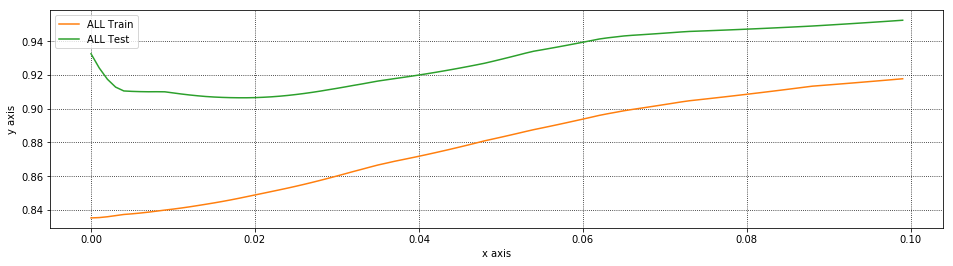

ALL 訓練 二乗誤差、最小：0.835 最適な係数：0.000
ALL 汎化 二乗誤差、最小：0.906 最適な係数：0.018



In [85]:
#グラフ表示
showTwoGraph("ALL",ALLWaitMSE[:,0],ALLWaitMSE[:,1],ALLWaitMSE[:,2])


## Lasso：最適化済みのパラメータによるテスト

In [86]:
# グリッドサーチにて推定したまともそうなパラメーターチェック
call = lassoTest

param   = checkAParam(ALLWaitMSE[:,0],ALLWaitMSE[:,2])
param   = {"alpha":param["bestWait"]}
ret_ALL = call(testData,param)
printRetValue("ALL",ret_ALL)


ALL 重み1：0.007 重み2：-0.261 重み3：-0.053 重み4：-0.313 重み5：0.234 重み6：-0.000 重み7：0.339 重み8：0.000 重み9：0.000
ALLバイアス：4.900
ALL訓練 二乗誤差：0.847
ALL汎化 二乗誤差：0.906



## Ridge：交差検証でのグリッドサーチ

In [87]:
size   = 150
offset = 0
step   = 1
total  = offset + size * step
model = ridgeTest

ALLWaitMSE = np.ones(size * 3).reshape(-1,3)
ALLWaitMSE[:,0] *= np.arange(offset,total,step)

cnt = 0
for alpha_Wait in ALLWaitMSE[:,0]:
    param = {"alpha":alpha_Wait}

    ret_ALL  = model(testData ,param)
    ALLWaitMSE[cnt,1]  = ret_ALL["mse_train"]
    ALLWaitMSE[cnt,2]  = ret_ALL["mse_test"]

    cnt+=1


## Ridge：パラメーターの推定結果(テストデータの切り方に依存する)

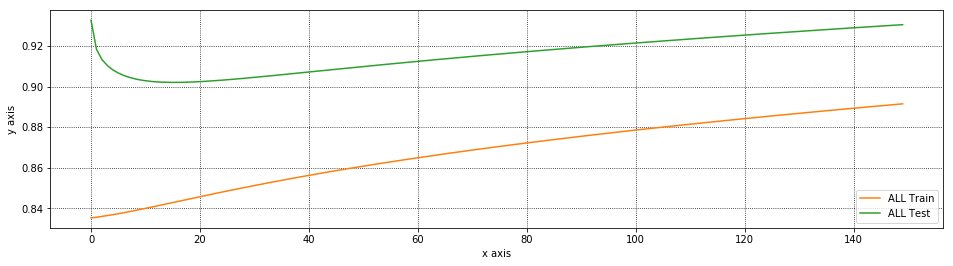

ALL 訓練 二乗誤差、最小：0.835 最適な係数：0.000
ALL 汎化 二乗誤差、最小：0.902 最適な係数：15.000



In [88]:
#グラフ表示
showTwoGraph("ALL",ALLWaitMSE[:,0],ALLWaitMSE[:,1],ALLWaitMSE[:,2])


## Ridge：最適化済みのパラメータによるテスト

In [89]:
# グリッドサーチにて推定したまともそうなパラメーターチェック
call = ridgeTest

param   = checkAParam(ALLWaitMSE[:,0],ALLWaitMSE[:,2])
param   = {"alpha":param["bestWait"]}
ret_ALL = call(testData,param)
printRetValue("ALL",ret_ALL)


ALL 重み1：0.035 重み2：-0.277 重み3：-0.068 重み4：-0.304 重み5：0.295 重み6：-0.108 重み7：0.339 重み8：0.007 重み9：-0.004
ALLバイアス：4.907
ALL訓練 二乗誤差：0.843
ALL汎化 二乗誤差：0.902



## ElasticNet：交差検証でのグリッドサーチ

In [98]:
# alpha Param
size    = 50
offset  = 0.001
step    = 0.002
total   = offset + size * step

size_ratio = 10
l1offset   = 0
l1lim      = 0.01

ALLWaitMSE = np.ones( size * size_ratio * 4).reshape(size_ratio,-1,4)
ALLWaitMSE[:,:,0] *= np.arange(offset,total,step)
for i in range(size):
    ALLWaitMSE[:,i,3] *= np.linspace(l1offset,l1lim,size_ratio)

cnt2 = 0
for l1_ratio in ALLWaitMSE[:,0,3]:
    cnt = 0
    for alpha_Wait in ALLWaitMSE[0,:,0]:
    
        param = {"alpha":alpha_Wait,"l1_ratio":l1_ratio}
        ret_ALL  = elasticNetTest(testData,param)
        ALLWaitMSE[cnt2,cnt,1]  = ret_ALL["mse_train"]
        ALLWaitMSE[cnt2,cnt,2]  = ret_ALL["mse_test"]

        cnt+=1
    cnt2+=1


In [99]:
display(ALLWaitMSE[:,0,3])
display(ALLWaitMSE[0,:,0])

array([0.        , 0.00111111, 0.00222222, 0.00333333, 0.00444444,
       0.00555556, 0.00666667, 0.00777778, 0.00888889, 0.01      ])

array([0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.017,
       0.019, 0.021, 0.023, 0.025, 0.027, 0.029, 0.031, 0.033, 0.035,
       0.037, 0.039, 0.041, 0.043, 0.045, 0.047, 0.049, 0.051, 0.053,
       0.055, 0.057, 0.059, 0.061, 0.063, 0.065, 0.067, 0.069, 0.071,
       0.073, 0.075, 0.077, 0.079, 0.081, 0.083, 0.085, 0.087, 0.089,
       0.091, 0.093, 0.095, 0.097, 0.099])

## ElasticNet：パラメーターの推定結果(テストデータの切り方に依存する)

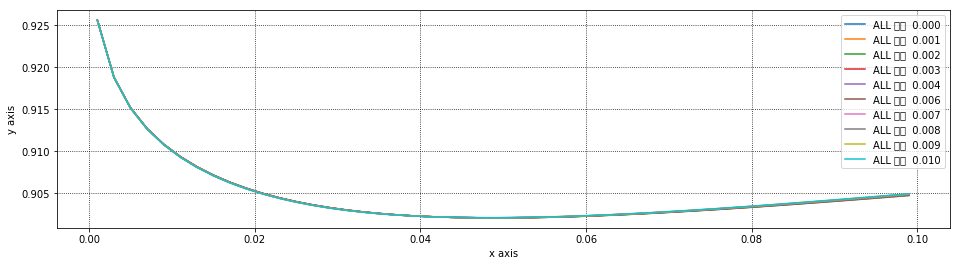

ALL 汎化   二乗誤差、最小：0.902 最適な係数：0.049 L1の寄与率：0.000000



In [100]:
#グラフ表示
#showMultiGraph("ALL 訓練 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,1], ALLWaitMSE[:,:,3])
showMultiGraph("ALL 汎化 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,2], ALLWaitMSE[:,:,3])


## ElasticNet：最適化済みのパラメータによるテスト

In [101]:
param   = check2Param(ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,2], ALLWaitMSE[:,:,3])
param    = {"alpha":param["bestWait"],"l1_ratio":param["bestRatio"]}
ret_ALL = elasticNetTest(testData,param)
printRetValue("ALL",ret_ALL)


ALL 重み1：0.035 重み2：-0.276 重み3：-0.068 重み4：-0.304 重み5：0.294 重み6：-0.107 重み7：0.337 重み8：0.007 重み9：-0.004
ALLバイアス：4.907
ALL訓練 二乗誤差：0.843
ALL汎化 二乗誤差：0.902
ALLL1正則化比重：0.000



In [103]:
# Ridge向き、全ての変数がそれなりに動作している様子
param = {"alpha":0.049,"l1_ratio":0.000}
ret_ALL = elasticNetTest(testData,param)
printRetValue("ALL",ret_ALL)

ALL 重み1：0.035 重み2：-0.276 重み3：-0.068 重み4：-0.304 重み5：0.294 重み6：-0.107 重み7：0.337 重み8：0.007 重み9：-0.004
ALLバイアス：4.907
ALL訓練 二乗誤差：0.843
ALL汎化 二乗誤差：0.902
ALLL1正則化比重：0.000



# ここまでがDay2の再調整

# アンサンブル モデルの実装模索

In [18]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree     import DecisionTreeRegressor

def RFregTest(_test,_param):
    clf = RandomForestRegressor(random_state = _test.getRandom())
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

def adbL2Test(_test,_param):
    clf = AdaBoostRegressor(L2(_param["alpha"]))
    mse_ret = _test.do(clf)
    ret = {"alpha":_param["alpha"],"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

def adbRFTest(_test,_param):
    clf = AdaBoostRegressor(RandomForestRegressor(random_state = _test.getRandom()))
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

def adbDTTest(_test,_param):
    clf = AdaBoostRegressor(DecisionTreeRegressor(random_state = _test.getRandom()))
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

def DTregTest(_test,_param):
    clf = DecisionTreeRegressor(random_state = _test.getRandom())
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

#Init signature:
#DecisionTreeRegressor(
#    max_depth=None, #深度
#    min_samples_split=2,
#    min_samples_leaf=1,
#    min_weight_fraction_leaf=0.0,
#    random_state=None,
#    min_impurity_decrease=0.0, # 正則化項
#    min_impurity_split=None,
#    presort=False,
#)
def DTregTest2(_test,_param):
    mxd = _param["max_depth"]
    mid = _param["min_impurity_decrease"]
    mis = _param["min_impurity_split"]
    clf = DecisionTreeRegressor(random_state = _test.getRandom(),
                                max_depth=mxd,
                                min_impurity_decrease=mid,
                                min_impurity_split=mis)
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom(),
           "max_depth":mxd,
           "min_impurity_decrease":mid,
           "min_impurity_split":mis}
    ret.update(mse_ret)
    return ret

def RFregTest2(_test,_param):
    mxd = _param["max_depth"]
    mid = _param["min_impurity_decrease"]
    mis = _param["min_impurity_split"]
    clf = RandomForestRegressor(random_state = _test.getRandom(),
                                max_depth=mxd,
                                min_impurity_decrease=mid,
                                min_impurity_split=mis)
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret

def adaBoostTest(_test,_model,_param):
    clf = AdaBoostRegressor(_model(random_state = _test.getRandom()))
    mse_ret = _test.do(clf)
    ret = {"random":_test.getRandom()}
    ret.update(mse_ret)
    return ret



In [19]:
# ランダムフォレストによる実装が非常に強力
ret_ALL  = RFregTest(testData,param)
printRetValue("ALL RFreg",ret_ALL)

# ランダムフォレストにAdaBoostを追加すると過学習が加速する
ret_ALL  = adbRFTest(testData,param)
printRetValue("ALL adbRFreg",ret_ALL)

# 通常の決定木にAdaBoostを追加するとさらに過学習が加速する
# MaxDepthを評価して調整する機構があれば良いか？
ret_ALL  = adbDTTest(testData,param)
printRetValue("ALL adbDTreg",ret_ALL)

ret_ALL  = adaBoostTest(testData,L1,param)
printRetValue("ALL adbL1",ret_ALL)

ret_ALL  = adaBoostTest(testData,L2,param)
printRetValue("ALL adbL2",ret_ALL)

param = {"alpha":0.3}
ret_ALL  = adbL2Test(testData,param)
printRetValue("ALL adbL2_2",ret_ALL)

ret_ALL  = adaBoostTest(testData,EN,param)
printRetValue("ALL adbEN",ret_ALL)

ret_ALL  = DTregTest(testData,param)
printRetValue("ALL DTreg",ret_ALL)



ALL RFreg訓練 二乗誤差：0.098
ALL RFreg汎化 二乗誤差：0.597

ALL adbRFreg訓練 二乗誤差：0.043
ALL adbRFreg汎化 二乗誤差：0.572

ALL adbDTreg訓練 二乗誤差：0.005
ALL adbDTreg汎化 二乗誤差：0.628

ALL adbL1訓練 二乗誤差：1.176
ALL adbL1汎化 二乗誤差：1.222

ALL adbL2訓練 二乗誤差：1.114
ALL adbL2汎化 二乗誤差：1.280

ALL adbL2_2訓練 二乗誤差：1.061
ALL adbL2_2汎化 二乗誤差：1.218

ALL adbEN訓練 二乗誤差：1.191
ALL adbEN汎化 二乗誤差：1.313

ALL DTreg訓練 二乗誤差：0.001
ALL DTreg汎化 二乗誤差：0.811



In [20]:
# alpha Param
size    = 8
offset  = 2
step    = 1
total   = offset + size * step

size_decrease = 10
l1offset      = 0
l1lim         = 0.016

ALLWaitMSE = np.ones( size * size_decrease * 4).reshape(size_decrease,-1,4)
ALLWaitMSE[:,:,0] *= np.arange(offset,total,step) # np.linspace(offset,step,size)
for i in range(size):
    ALLWaitMSE[:,i,3] *= np.linspace(l1offset,l1lim,size_decrease)

cnt2 = 0
for min_impurity_decrease in ALLWaitMSE[:,0,3]:
    cnt = 0
    for max_depth in ALLWaitMSE[0,:,0]:

        param = {"max_depth":max_depth,"min_impurity_decrease":min_impurity_decrease,"min_impurity_split":1e-7}
        ret_ALL  = DTregTest2(testData,param)
        ALLWaitMSE[cnt2,cnt,1]  = ret_ALL["mse_train"]
        ALLWaitMSE[cnt2,cnt,2]  = ret_ALL["mse_test"]

        cnt+=1
    cnt2+=1


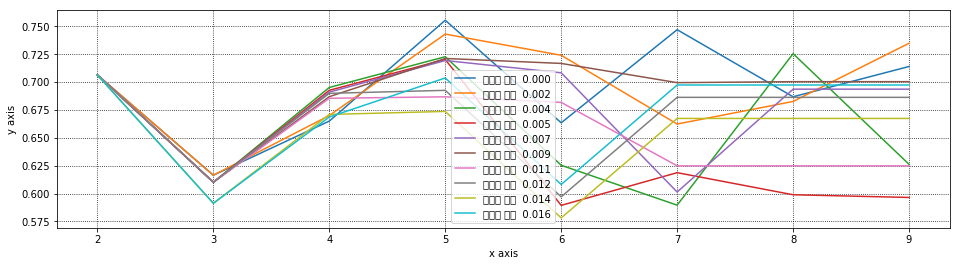

決定木 汎化   二乗誤差、最小：0.578 最適な分割数：6.000 最適な不純度の許容値：0.014222



In [21]:
#グラフ表示
#showMultiGraph("ALL 訓練 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,1], ALLWaitMSE[:,:,3])
showMultiGraph2("決定木 汎化 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,2], ALLWaitMSE[:,:,3])


In [22]:
# Ridge向き、L1正則化も僅かに効く？
param = {"max_depth":5,"min_impurity_decrease":0.0106,"min_impurity_split":None}
ret_ALL  = DTregTest2(testData,param)
printRetValue("ALL",ret_ALL)

ALL訓練 二乗誤差：0.311
ALL汎化 二乗誤差：0.687



In [23]:
# alpha Param
size    = 20
offset  = 2
step    = 1
total   = offset + size * step

size_decrease = 10
l1offset      = 0
l1lim         = 0.005

ALLWaitMSE = np.ones( size * size_decrease * 4).reshape(size_decrease,-1,4)
ALLWaitMSE[:,:,0] *= np.arange(offset,total,step) # np.linspace(offset,step,size)
for i in range(size):
    ALLWaitMSE[:,i,3] *= np.linspace(l1offset,l1lim,size_decrease)

cnt2 = 0
for min_impurity_decrease in ALLWaitMSE[:,0,3]:
    cnt = 0
    for max_depth in ALLWaitMSE[0,:,0]:

        param = {"max_depth":max_depth,"min_impurity_decrease":min_impurity_decrease,"min_impurity_split":9.5e-15}
        ret_ALL  = RFregTest2(testData,param)
        ALLWaitMSE[cnt2,cnt,1]  = ret_ALL["mse_train"]
        ALLWaitMSE[cnt2,cnt,2]  = ret_ALL["mse_test"]

        cnt+=1
    cnt2+=1


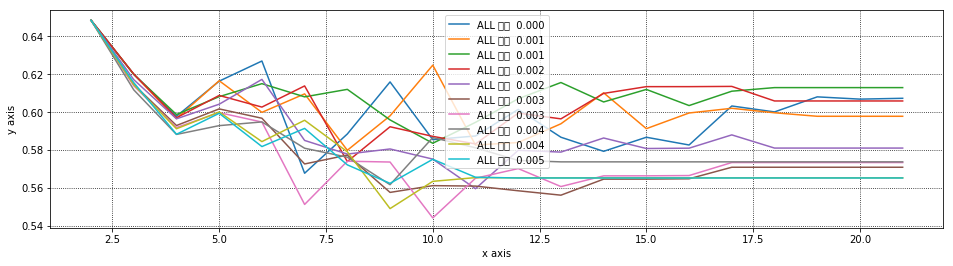

ALL 汎化   二乗誤差、最小：0.544 最適な分割数：10.000 最適な不純度の許容値：0.003333



In [24]:
#グラフ表示
#showMultiGraph("ALL 訓練 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,1], ALLWaitMSE[:,:,3])
showMultiGraph2("ALL 汎化 ", ALLWaitMSE[:,:,0], ALLWaitMSE[:,:,2], ALLWaitMSE[:,:,3])


In [25]:
# ランダムフォレスト回帰のほうが僅かに誤差が少ない
param = {"max_depth":13,"min_impurity_decrease":0.00222,"min_impurity_split":9.5e-15}
ret_ALL  = RFregTest2(testData,param)
printRetValue("ALL",ret_ALL)

ALL訓練 二乗誤差：0.144
ALL汎化 二乗誤差：0.579



In [26]:
# 次の課題、モデル調整用の処理を体系化する
# モデルに対して、どの様に変数を処理すれば良いか検討する
# Adboostによる回帰の調整を検討する

In [55]:
class Tuning:
    def __init__(self):
        self.result = pd.DataFrame()
    # 複数の係数をグリッドサーチで検索する場合
    # 最適なパラメーターを計算した後にグラフ化して遷移を見たい
    # 最適なパラメーターにおける横の変化率だけ確認する？
    # また末端の変化率が下降傾向で止まっているデータについて探索が完了していないことを警告する？
    def gridSearch(self,_testData,_testFunc,_paramDict):

        #パラメーターのデータセットは辞書型で渡る想定
        # {"パラメーター名":係数リスト,"パラメーター名":係数リスト}
        # 汎化誤差、訓練誤差、各実行パラメーターを持つリストを生成する
        # 0＝汎化誤差、1＝訓練誤差、2～＝パラメーター
        rowSize   = len(_paramDict.keys()) + 2
        totalSize = 1
        counter   = {"keys"          :[],
                     "useCount"      :[],
                     "replaceOffset" :[],
                     "replacingCount":[]}

        for key in _paramDict.keys():
            counter["keys"].append(key)
            counter["replaceOffset"].append(totalSize)
            counter["replacingCount"].append(1)
            counter["useCount"].append(0)
            totalSize = totalSize * len(_paramDict[key])

        counter["replaceOffset"]  = np.array(counter["replaceOffset"]) 
        counter["replacingCount"] = np.array(counter["replacingCount"])
        counter["useCount"]       = np.array(counter["useCount"])

        param = {}
        paramList = np.ones(totalSize * rowSize).reshape(totalSize,rowSize)
        min_mse   = 100000000000
        bestIndex = -1
        for index in range(totalSize):

            counter["replacingCount"] -= 1
            for paramIndex,isReplace in zip(range(rowSize-2),counter["replacingCount"] == 0):
                if isReplace:
                    keyName    = counter["keys"][paramIndex]
                    useCount   = counter["useCount"][paramIndex]
                    resetCount = counter["replaceOffset"][paramIndex]

                    param[keyName]                        = _paramDict[keyName][useCount]
                    counter["useCount"][paramIndex]       = ( useCount + 1 ) % len(_paramDict[keyName])
                    counter["replacingCount"][paramIndex] = resetCount

            result = _testFunc(_testData,param)
            paramList[index,0]  = result["mse_test"]
            paramList[index,1]  = result["mse_train"]
            paramList[index,2:] = list(param.values())

            if min_mse > paramList[index,0]:
                min_mse = paramList[index,0]
                bestIndex = index

        col  = ["mse_test","mse_train"]
        keys = list(_paramDict.keys())
        col  = col + keys
        df   = pd.DataFrame(list(paramList[:,:]))
        df.columns = col
        self.result = {"min_mse":min_mse,"bestIndex":bestIndex,"testResult":df}
        return self.result

    def showGraph(self,_Train=True):
        bestIndex = self.result["bestIndex"]
        df        = self.result["testResult"]

        values    = df.loc[bestIndex]
        keys      = list(df.loc[bestIndex:bestIndex])[2:]
        entrys    = zip(keys,list(values)[2:])
        wheres    = []
        getGraphs = {}

        for key,value in entrys:
            where  = " " + key + " == " + str(value) + " "
            wheres.append(str(where))

        keyIndexs  = zip(keys,range(len(wheres)))

        for key,index in keyIndexs:
            cnt = -1
            whereKey = ""
            prefix   = ""
            for where in wheres:
                cnt += 1
                if cnt == index:
                    continue
                    
                whereKey = whereKey + prefix + where
                prefix   = "&"

            getGraphs[key] = df.query(whereKey)

        display(df.loc[bestIndex:bestIndex])
        print("訓練誤差：{:.3f}".format(values["mse_train"]))
        print("汎化誤差：{:.3f}".format(values["mse_test"]))
        for paramName,graphValue in getGraphs.items():
            
            print("Optimized {}：{}".format(paramName,values[paramName]))

            xParam = graphValue[[paramName]]
            yTrain = graphValue[["mse_train"]]
            yTest  = graphValue[["mse_test"]]

            plt.figure(figsize=(16,4))
            plt.grid(which='major',color='black',linestyle=':')
            plt.xlabel(paramName)
            plt.ylabel("mse")
            
            plt.plot(xParam,yTest, label="Test")
            if _Train:
                plt.plot(xParam,yTrain,label="Train")

            plt.legend()
            plt.show()

            print("")        


In [ ]:
tuningObject = Tuning()
result = tuningObject.gridSearch(testData,RFregTest2,
          {"max_depth":            np.arange(7,14),
            "min_impurity_decrease":np.linspace(5e-4,5e-3,30),
#             "min_impurity_decrease":np.linspace(1e-4,1e-2,10),
#            "min_impurity_decrease":np.array([0.0023]),
            "min_impurity_split":   np.linspace(1e-14,3e-14,30),
#            "min_impurity_split":   np.array([2.100000e-14]),
          })

tuningObject.showGraph(_Train=False)


In [48]:
def min(_v1,_v2):
    if _v1 < _v2:
        return _v1
    else:
        return _v2

def max(_v1,_v2):
    if _v1 > _v2:
        return _v1
    else:
        return _v2

bestIndex  = result["bestIndex"]
df         = result["testResult"]

minLoc     = max(0,bestIndex-2)
maxLoc     = min(len(df),bestIndex+2)
display(df.loc[bestIndex:bestIndex])
display(df.loc[minLoc:maxLoc])



,mse_test,mse_train,max_depth,min_impurity_decrease,min_impurity_split
75,0.562574,0.118172,13.0,0.001,5.500000e-15


,mse_test,mse_train,max_depth,min_impurity_decrease,min_impurity_split
73,0.600203,0.122339,11.0,0.00100,5.500000e-15
74,0.582258,0.121495,12.0,0.00100,5.500000e-15
75,0.562574,0.118172,13.0,0.00100,5.500000e-15
76,0.592569,0.119167,14.0,0.00100,5.500000e-15
77,0.602008,0.378566,8.0,0.02575,5.500000e-15
